## Tensorflow with example

Thanks to @edureka on youtube.com, I prepared the following notebook for a quick hands-on neural network model for a classification problem. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('./Sonar.csv')

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [4]:
X = df.drop('Class', axis = 1).values
y = df['Class']

In [5]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [6]:
y_o = one_hot_encode(y)

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_o, test_size = 0.2, random_state = 0)

In [35]:
learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype = float)
n_dim = X.shape[1]
n_class = 2
model_path = "./dp_model/dp_solar_model"

In [9]:
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

In [10]:
# y_ = w * x + b
x = tf.placeholder(dtype=tf.float32,  shape=[None, n_dim], name= 'x', )
w = tf.Variable(tf.zeros([n_dim, n_class]), name = 'w')
b = tf.Variable(tf.zeros([n_class]), name = 'b')
y_ = tf.placeholder(dtype=tf.float32,  shape = [None, n_class], name = 'y_')

In [11]:
def multilayer_perception(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    layer_2 = tf.add(tf.matmul(x, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    layer_3 = tf.add(tf.matmul(x, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    layer_4 = tf.add(tf.matmul(x, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

In [12]:
weights = {
    'h1' : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2' : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3' : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4' : tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out' : tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

biases = {
    'b1' : tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3' : tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4' : tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out' : tf.Variable(tf.truncated_normal([n_class]))
}

In [37]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [14]:
y = multilayer_perception(x, weights, biases)

In [15]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y, labels=y_))

In [16]:
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [17]:
sess = tf.Session()
sess.run(init)

In [18]:
mse_history = []
accuracy_history = []

In [19]:
Xtrain.shape

(166, 60)

In [20]:
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:Xtrain, y_:ytrain})
    cost = sess.run(cost_function, feed_dict={x:Xtrain, y_:ytrain})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))
    accuracy_ = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    y_pred = sess.run(y, feed_dict={x: Xtrain})
    mse_ = tf.reduce_mean(tf.square(ytrain - y_pred))
    mse = sess.run(mse_)
    mse_history.append(mse)
    accuracy = sess.run(accuracy_, feed_dict={x:Xtrain, y_:ytrain})
    accuracy_history.append(accuracy)
    print("epoch : ", epoch, " - cost : ", cost, "- MSE", mse, "- accuracy", accuracy)

epoch :  0  - cost :  18.8677 - MSE 483.121134782 - accuracy 0.542169
epoch :  1  - cost :  1.97344 - MSE 21.2651400423 - accuracy 0.542169
epoch :  2  - cost :  5.27481 - MSE 60.2678980195 - accuracy 0.542169
epoch :  3  - cost :  4.08692 - MSE 33.8457472098 - accuracy 0.457831
epoch :  4  - cost :  4.81325 - MSE 55.633071289 - accuracy 0.542169
epoch :  5  - cost :  1.04003 - MSE 15.6446512799 - accuracy 0.626506
epoch :  6  - cost :  0.922344 - MSE 14.9292420359 - accuracy 0.60241
epoch :  7  - cost :  0.873597 - MSE 14.2201903147 - accuracy 0.650602
epoch :  8  - cost :  0.808815 - MSE 13.9696973338 - accuracy 0.63253
epoch :  9  - cost :  0.798492 - MSE 13.6385031504 - accuracy 0.656627
epoch :  10  - cost :  0.746132 - MSE 13.4813528629 - accuracy 0.620482
epoch :  11  - cost :  0.779293 - MSE 13.4747903669 - accuracy 0.680723
epoch :  12  - cost :  0.723457 - MSE 13.2440682164 - accuracy 0.644578
epoch :  13  - cost :  0.808272 - MSE 13.6265153282 - accuracy 0.668675
epoch :  14

epoch :  116  - cost :  0.224862 - MSE 13.1529033155 - accuracy 0.921687
epoch :  117  - cost :  0.226773 - MSE 13.2514993085 - accuracy 0.903614
epoch :  118  - cost :  0.220396 - MSE 13.1624052935 - accuracy 0.921687
epoch :  119  - cost :  0.220613 - MSE 13.2637381865 - accuracy 0.909639
epoch :  120  - cost :  0.214837 - MSE 13.1807026289 - accuracy 0.921687
epoch :  121  - cost :  0.217756 - MSE 13.260727036 - accuracy 0.903614
epoch :  122  - cost :  0.211946 - MSE 13.2046440893 - accuracy 0.927711
epoch :  123  - cost :  0.211633 - MSE 13.2987078682 - accuracy 0.909639
epoch :  124  - cost :  0.206637 - MSE 13.2334223977 - accuracy 0.927711
epoch :  125  - cost :  0.2061 - MSE 13.3153163715 - accuracy 0.909639
epoch :  126  - cost :  0.201139 - MSE 13.2558743842 - accuracy 0.927711
epoch :  127  - cost :  0.200606 - MSE 13.3360706471 - accuracy 0.915663
epoch :  128  - cost :  0.196619 - MSE 13.2883919223 - accuracy 0.939759
epoch :  129  - cost :  0.195248 - MSE 13.367800596 - 

epoch :  229  - cost :  0.103407 - MSE 15.7907281509 - accuracy 0.981928
epoch :  230  - cost :  0.102208 - MSE 15.7409780787 - accuracy 0.975904
epoch :  231  - cost :  0.102649 - MSE 15.8556216945 - accuracy 0.981928
epoch :  232  - cost :  0.10159 - MSE 15.7587914917 - accuracy 0.975904
epoch :  233  - cost :  0.101321 - MSE 15.8992299169 - accuracy 0.981928
epoch :  234  - cost :  0.100419 - MSE 15.8122272009 - accuracy 0.975904
epoch :  235  - cost :  0.100604 - MSE 15.9412910658 - accuracy 0.981928
epoch :  236  - cost :  0.0992492 - MSE 15.8761165739 - accuracy 0.975904
epoch :  237  - cost :  0.0992012 - MSE 15.9906057082 - accuracy 0.981928
epoch :  238  - cost :  0.0982563 - MSE 15.8882241759 - accuracy 0.981928
epoch :  239  - cost :  0.0984678 - MSE 16.0253054445 - accuracy 0.981928
epoch :  240  - cost :  0.0973486 - MSE 15.9514896707 - accuracy 0.981928
epoch :  241  - cost :  0.0975 - MSE 16.0760576818 - accuracy 0.981928
epoch :  242  - cost :  0.096499 - MSE 15.9866569

epoch :  341  - cost :  0.0600977 - MSE 18.4505059768 - accuracy 0.993976
epoch :  342  - cost :  0.059967 - MSE 18.3529851498 - accuracy 1.0
epoch :  343  - cost :  0.059899 - MSE 18.5090699743 - accuracy 0.993976
epoch :  344  - cost :  0.0596824 - MSE 18.358409722 - accuracy 1.0
epoch :  345  - cost :  0.0595683 - MSE 18.523529436 - accuracy 0.993976
epoch :  346  - cost :  0.059236 - MSE 18.405904367 - accuracy 1.0
epoch :  347  - cost :  0.0591684 - MSE 18.5668874706 - accuracy 0.993976
epoch :  348  - cost :  0.0587396 - MSE 18.4267446075 - accuracy 1.0
epoch :  349  - cost :  0.0585508 - MSE 18.5924383314 - accuracy 0.993976
epoch :  350  - cost :  0.058151 - MSE 18.4755967327 - accuracy 1.0
epoch :  351  - cost :  0.0577036 - MSE 18.6385009578 - accuracy 0.993976
epoch :  352  - cost :  0.0572401 - MSE 18.5030470327 - accuracy 1.0
epoch :  353  - cost :  0.0570475 - MSE 18.6571659904 - accuracy 0.993976
epoch :  354  - cost :  0.0566568 - MSE 18.5527267341 - accuracy 1.0
epoch 

epoch :  459  - cost :  0.03717 - MSE 20.3539313373 - accuracy 1.0
epoch :  460  - cost :  0.0370859 - MSE 20.3500576367 - accuracy 1.0
epoch :  461  - cost :  0.0370029 - MSE 20.3922613302 - accuracy 1.0
epoch :  462  - cost :  0.0368803 - MSE 20.375932969 - accuracy 1.0
epoch :  463  - cost :  0.0367667 - MSE 20.4083219152 - accuracy 1.0
epoch :  464  - cost :  0.036625 - MSE 20.4146012201 - accuracy 1.0
epoch :  465  - cost :  0.0364809 - MSE 20.4725492192 - accuracy 1.0
epoch :  466  - cost :  0.0364046 - MSE 20.4574642669 - accuracy 1.0
epoch :  467  - cost :  0.0363037 - MSE 20.4859050539 - accuracy 1.0
epoch :  468  - cost :  0.0361607 - MSE 20.4837427626 - accuracy 1.0
epoch :  469  - cost :  0.0360467 - MSE 20.5133500132 - accuracy 1.0
epoch :  470  - cost :  0.0359098 - MSE 20.4905736024 - accuracy 1.0
epoch :  471  - cost :  0.0358158 - MSE 20.5320614877 - accuracy 1.0
epoch :  472  - cost :  0.0357073 - MSE 20.5356497391 - accuracy 1.0
epoch :  473  - cost :  0.0355735 - MS

epoch :  579  - cost :  0.0263806 - MSE 21.9771301073 - accuracy 1.0
epoch :  580  - cost :  0.0263082 - MSE 21.9815203617 - accuracy 1.0
epoch :  581  - cost :  0.0262557 - MSE 21.9867740088 - accuracy 1.0
epoch :  582  - cost :  0.0261767 - MSE 21.9852932733 - accuracy 1.0
epoch :  583  - cost :  0.0260979 - MSE 22.013581166 - accuracy 1.0
epoch :  584  - cost :  0.0260422 - MSE 22.0323415001 - accuracy 1.0
epoch :  585  - cost :  0.0259655 - MSE 22.0416633776 - accuracy 1.0
epoch :  586  - cost :  0.0258992 - MSE 22.0457575388 - accuracy 1.0
epoch :  587  - cost :  0.025851 - MSE 22.0725690752 - accuracy 1.0
epoch :  588  - cost :  0.0257916 - MSE 22.0866348148 - accuracy 1.0
epoch :  589  - cost :  0.0257396 - MSE 22.1051085386 - accuracy 1.0
epoch :  590  - cost :  0.0256561 - MSE 22.0980855623 - accuracy 1.0
epoch :  591  - cost :  0.0255695 - MSE 22.1218661501 - accuracy 1.0
epoch :  592  - cost :  0.0255082 - MSE 22.1336452691 - accuracy 1.0
epoch :  593  - cost :  0.0254527 - 

epoch :  699  - cost :  0.0199194 - MSE 23.3648123581 - accuracy 1.0
epoch :  700  - cost :  0.0198693 - MSE 23.3710778567 - accuracy 1.0
epoch :  701  - cost :  0.0198258 - MSE 23.400502116 - accuracy 1.0
epoch :  702  - cost :  0.0197895 - MSE 23.3919279423 - accuracy 1.0
epoch :  703  - cost :  0.0197453 - MSE 23.4205755737 - accuracy 1.0
epoch :  704  - cost :  0.0197011 - MSE 23.4174154903 - accuracy 1.0
epoch :  705  - cost :  0.0196619 - MSE 23.426690593 - accuracy 1.0
epoch :  706  - cost :  0.0196334 - MSE 23.4586071006 - accuracy 1.0
epoch :  707  - cost :  0.0195989 - MSE 23.466001702 - accuracy 1.0
epoch :  708  - cost :  0.0195622 - MSE 23.4765438323 - accuracy 1.0
epoch :  709  - cost :  0.0195004 - MSE 23.4692300662 - accuracy 1.0
epoch :  710  - cost :  0.01947 - MSE 23.493676001 - accuracy 1.0
epoch :  711  - cost :  0.019418 - MSE 23.4891853442 - accuracy 1.0
epoch :  712  - cost :  0.0193777 - MSE 23.5241518629 - accuracy 1.0
epoch :  713  - cost :  0.0193415 - MSE 2

epoch :  819  - cost :  0.0157626 - MSE 24.5998213262 - accuracy 1.0
epoch :  820  - cost :  0.0157305 - MSE 24.6011550322 - accuracy 1.0
epoch :  821  - cost :  0.015711 - MSE 24.6062795899 - accuracy 1.0
epoch :  822  - cost :  0.0156817 - MSE 24.6262720443 - accuracy 1.0
epoch :  823  - cost :  0.0156539 - MSE 24.628273457 - accuracy 1.0
epoch :  824  - cost :  0.0156205 - MSE 24.6360486983 - accuracy 1.0
epoch :  825  - cost :  0.0155915 - MSE 24.6548625085 - accuracy 1.0
epoch :  826  - cost :  0.0155743 - MSE 24.6426310136 - accuracy 1.0
epoch :  827  - cost :  0.0155412 - MSE 24.6555910184 - accuracy 1.0
epoch :  828  - cost :  0.0155053 - MSE 24.6679147137 - accuracy 1.0
epoch :  829  - cost :  0.015483 - MSE 24.6674758209 - accuracy 1.0
epoch :  830  - cost :  0.0154546 - MSE 24.6821595244 - accuracy 1.0
epoch :  831  - cost :  0.0154319 - MSE 24.6955524024 - accuracy 1.0
epoch :  832  - cost :  0.0154024 - MSE 24.7087148388 - accuracy 1.0
epoch :  833  - cost :  0.0153718 - M

epoch :  939  - cost :  0.0129012 - MSE 25.6043969827 - accuracy 1.0
epoch :  940  - cost :  0.0128894 - MSE 25.6167670853 - accuracy 1.0
epoch :  941  - cost :  0.0128628 - MSE 25.6219682201 - accuracy 1.0
epoch :  942  - cost :  0.0128422 - MSE 25.6325868831 - accuracy 1.0
epoch :  943  - cost :  0.0128222 - MSE 25.642245175 - accuracy 1.0
epoch :  944  - cost :  0.012804 - MSE 25.6386808775 - accuracy 1.0
epoch :  945  - cost :  0.0127883 - MSE 25.6524890726 - accuracy 1.0
epoch :  946  - cost :  0.0127725 - MSE 25.662546343 - accuracy 1.0
epoch :  947  - cost :  0.0127463 - MSE 25.6627241636 - accuracy 1.0
epoch :  948  - cost :  0.0127298 - MSE 25.6772267663 - accuracy 1.0
epoch :  949  - cost :  0.0127057 - MSE 25.6823263277 - accuracy 1.0
epoch :  950  - cost :  0.0126871 - MSE 25.7068570891 - accuracy 1.0
epoch :  951  - cost :  0.0126642 - MSE 25.6947515472 - accuracy 1.0
epoch :  952  - cost :  0.0126438 - MSE 25.7165452195 - accuracy 1.0
epoch :  953  - cost :  0.0126287 - M

In [38]:
save_path = saver.save(sess, model_path)

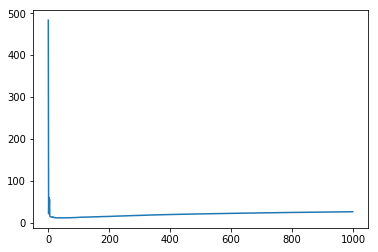

In [22]:
plt.plot(mse_history)

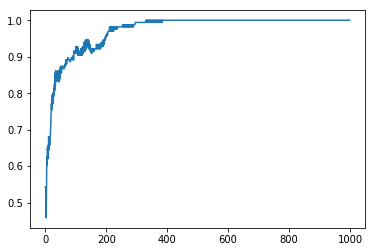

In [23]:
plt.plot(accuracy_history)

In [24]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))

In [25]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [26]:
print("Accuracy on the test set:", sess.run(accuracy, feed_dict={x:Xtest, y_:ytest}))

Accuracy on the test set: 0.857143


In [27]:
y_pred = sess.run(y, feed_dict={x:Xtest})

In [28]:
mse = tf.reduce_mean(tf.square(y_pred - ytest))

In [29]:
print("MSE: ", sess.run(mse))

MSE:  20.8669381295


In [30]:
sess.run(tf.argmax(y_pred,1))

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [31]:
print("Actual : Predict")
my_acc = 0
for i in range(len(ytest)):
    print(np.argmax(ytest[i]), " : ", sess.run(tf.argmax(y_pred,1))[i])
    my_acc += 1 / len(ytest) * (np.argmax(ytest[i]) == sess.run(tf.argmax(y_pred,1))[i]) * 1
print(my_acc)

Actual : Predict
1  :  0
1  :  1
1  :  0
1  :  1
0  :  0
1  :  1
0  :  0
0  :  0
1  :  1
0  :  0
1  :  1
0  :  0
1  :  1
0  :  0
1  :  1
1  :  1
0  :  0
1  :  1
1  :  1
1  :  1
0  :  0
1  :  1
1  :  0
1  :  1
1  :  1
0  :  0
0  :  0
0  :  0
0  :  0
0  :  0
1  :  1
0  :  0
0  :  0
1  :  1
0  :  0
0  :  0
0  :  0
0  :  0
1  :  0
0  :  1
0  :  0
1  :  0
0.857142857143


In [32]:
my_acc

0.85714285714285776